In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv('train.csv')

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114ae7fd0>,
      dtype=object)

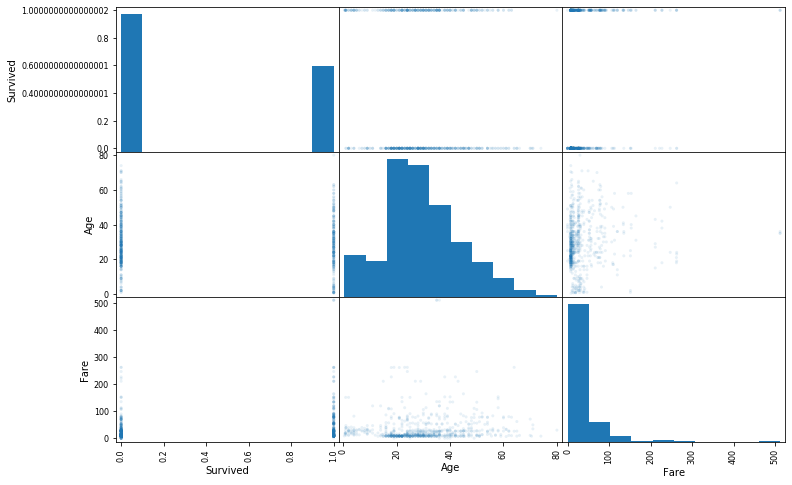

In [6]:
%matplotlib inline

attributes = ['Survived', 'Age', 'Fare']

pd.plotting.scatter_matrix(titanic[attributes], figsize=(12, 8), alpha=.1)

{'whiskers': [<matplotlib.lines.Line2D at 0x11596b0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x11596e810>,
 'boxes': [<matplotlib.lines.Line2D at 0x11596b090>],
 'medians': [<matplotlib.lines.Line2D at 0x11596bdd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x115976790>],
 'means': []}

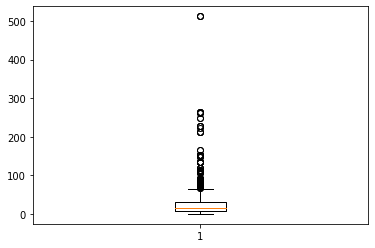

In [7]:
plt.boxplot(titanic['Fare']) # Lot of right skew and outliers

In [8]:
# There's a substantial right tail for Fare as revealed by boxplot, so I trim outliers  
trim_titanic = titanic[titanic['Fare'].between(titanic['Fare'].quantile(.5), titanic['Fare'].quantile(.95))]

{'whiskers': [<matplotlib.lines.Line2D at 0x1159e8490>,
 'caps': [<matplotlib.lines.Line2D at 0x1159e8ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1159e0790>],
 'medians': [<matplotlib.lines.Line2D at 0x1159f0950>],
 'fliers': [<matplotlib.lines.Line2D at 0x1159f0e50>],
 'means': []}

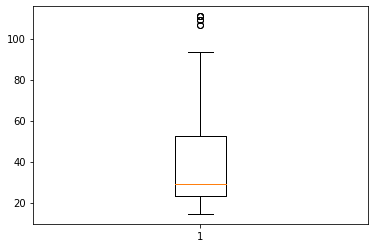

In [9]:
plt.boxplot(trim_titanic['Fare']) # Better!

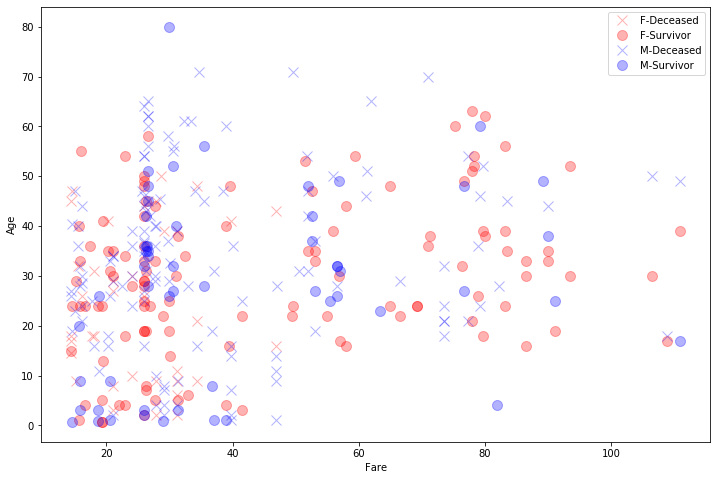

In [10]:
df = trim_titanic[['Age', 'Fare', 'Sex', 'Survived']] # Select columns

groups = df.groupby(['Sex', 'Survived']) # Group by Sex and Survivor Status

fig, ax = plt.subplots(figsize=(12,8))

for name, group in groups:
    for x in group.values:
        color = 'red' if x[2]=='female' else 'blue'
        mark = 'x' if x[3]==0 else 'o'
    ax.plot(group.Fare, group.Age, marker=mark, color=color, linestyle='', ms=10, alpha=.3, label=name)
    ax.set_xlabel('Fare')
    ax.set_ylabel('Age')
                
plt.legend(['F-Deceased','F-Survivor','M-Deceased','M-Survivor'])
plt.show()

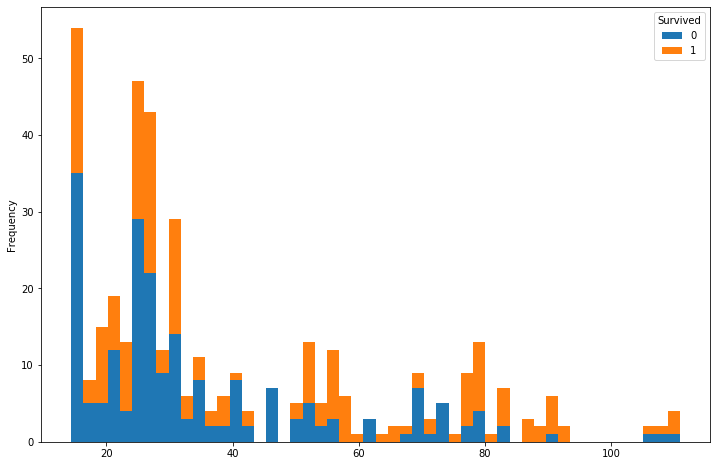

In [11]:
# 50 is a lot of bins, but I wanted to capture the lines observable in the scatterplot above
# I think this finds them
trim_titanic.pivot(columns='Survived').Fare.plot(kind='hist', bins=50, stacked=True, figsize=(12,8))